In [17]:
import numpy as np
import scipy.optimize as spo
from matplotlib import pyplot as plt


y = np.array([0.06, 0.106, 0.15, 0.21, 0.26, 0.43, 0.62])*100
x = (np.array([2.15, 3.00, 4.12, 4.73, 5.06, 7, 9.4])**2)/2
uy= np.array([0.01, 0.01, 0.01, 0.02, 0.02, 0.04, 0.04])*100
ux= np.array([0.02, 0.01, 0.02, 0.02, 0.02, 0.1, 0.2])*x


pente = 1.632 ± 0.136
ordonnée à l'origine = 2.461960133 ± 1.001888958


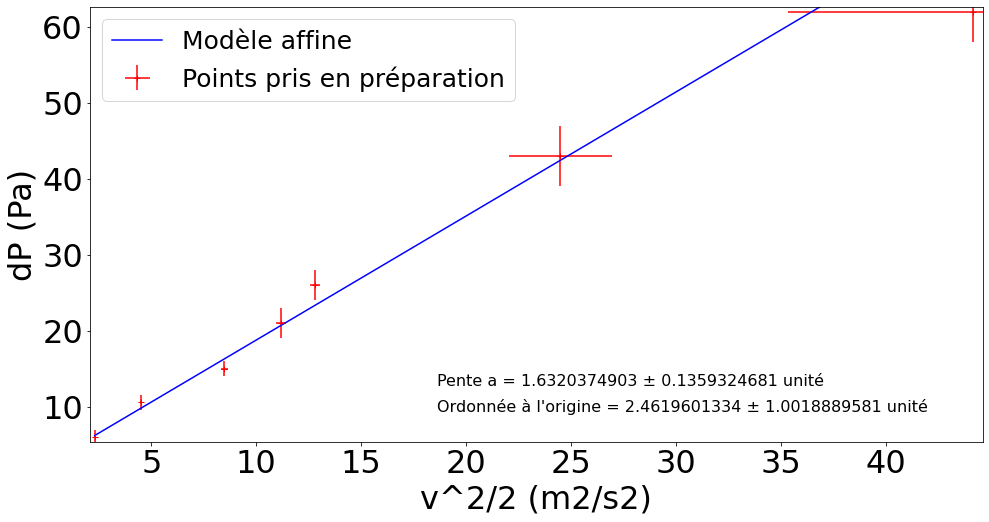

In [18]:
def f(x,p):
    a,b = p
    return a*x+b

def Dx_f(x,p):
    a,b = p
    return a

def residual(p,y,x):
    return (y-f(x,p))/np.sqrt(uy**2 +(Dx_f(x,p)*ux)**2)

p0 = np.array([0.1,0.1])


result = spo.leastsq(residual,p0,args=(y,x), full_output=True)
popt = result[0]
pcov = result[1]
upopt = np.sqrt(np.abs(np.diagonal(pcov)))



print('pente = ' + str(round(popt[0],3)) + ' ± ' + str(round(upopt[0],3)))
print('ordonnée à l\'origine = ' + str(round(popt[1],9)) + ' ± ' + str(round(upopt[1],9)))

plt.figure(figsize=(16,8))
x_mod = np.linspace(np.amin(x),np.amax(x),1000)
y_mod = f(x_mod,popt)
plt.plot(x_mod,y_mod,label='Modèle affine', color = 'blue', linestyle= '-')
plt.errorbar(x,y,xerr=ux,yerr=uy,marker='+', color = 'red', linestyle= '',label='Points pris en préparation')

#plt.errorbar(x_exp,y_exp,xerr=ux_exp,yerr=uy_exp,marker='+', color = 'green', linestyle='',label='Point(s) pris en direct')
plt.xlabel('v^2/2 (m2/s2)',fontsize=32)
plt.ylabel('dP (Pa)',fontsize=32)
plt.xticks(fontsize=32)
plt.yticks(fontsize=32)
plt.xlim(0.9*np.amin(x), 1.01*np.amax(x))
plt.ylim(0.9*np.amin(y), 1.01*np.amax(y))
plt.legend(loc='upper left',fontsize=25)
plt.text((np.amin(x)+np.amax(x))/2.5, np.amin(y) + (np.amin(y) + np.amax(y))/10 , 'Pente a = ' +str(round(popt[0],10)) + ' ± ' + str(round(upopt[0],10)) + ' unité',fontsize=16)
plt.text((np.amin(x)+np.amax(x))/2.5, np.amin(y) + (np.amin(y) + np.amax(y))/20, 'Ordonnée à l\'origine = ' + str(round(popt[1],10)) + ' ± ' + str(round(upopt[1],10)) + ' unité',fontsize=16)
plt.show()